# Ian Rabago, PHYS 404 - HW 9

## Wavelet Transform of Gravitational Wave Signal

### $y(t) = sin(t^2), 0<t<150$

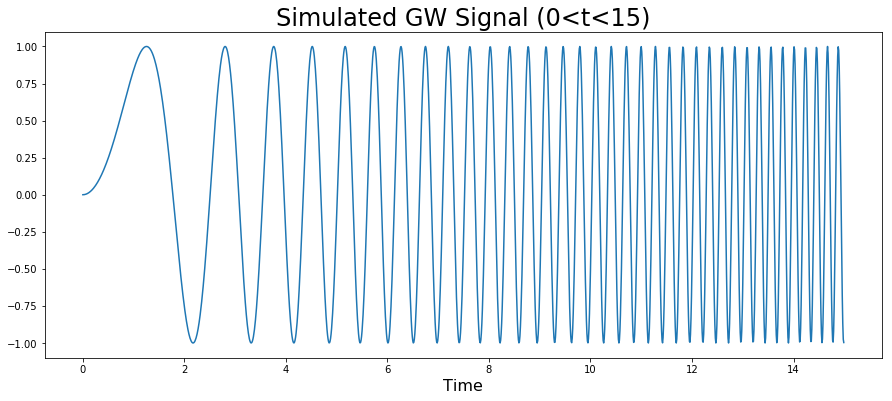

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = [0.01*i for i in range(1500)]
y = [np.sin(x[i]**2) for i in range(1500)]

fig = plt.figure(figsize=(15, 6))
plt.title("Simulated GW Signal (0<t<15)", fontsize=24)
plt.xlabel("Time", fontsize=16)
plt.plot(x, y)
plt.show()

To analyze this signal using wavelets, the Morelet function is used as a mother wavelet.

In [87]:
import numpy as np

ns=500                                  #Number of X values
ntau=600                                #Number of Y values
dstep=10./ns
sar=np.arange(0.001,10.001,dstep)        #range of X values
dtaustep=150./ntau
tauar=np.arange(0.,150.,dtaustep)        #range of Y values
ystau=np.zeros((ns, ntau),complex)

nt=15000
dtstep=150./nt
tar=np.arange(0.,150.,dtstep)

#Simple GW signal
def f(t):
    return np.sin(t**2)

#Mother wavelet used in the transform
def morlet(t,sigma):
    psi=np.exp(2.*np.pi*t*1j)*np.exp(-t*t/2./sigma/sigma)
    # psi = (1 - (t/sigma)**2)*np.exp(-1*t**2/(2*sigma**2))
    return psi

#Wavelet analysis function
yarr=np.zeros(nt)
def wavelet():     
    for idext in range(nt):
        yarr[idext]=f(tar[idext])
    for idexs in range(ns):
        for idextau in range(ntau):
            ystau[idexs,idextau]=1./np.sqrt(sar[idexs])*sum(np.conjugate(morlet((tar-tauar[idextau])/sar[idexs],1.))*yarr)*dtstep
            
wavelet()

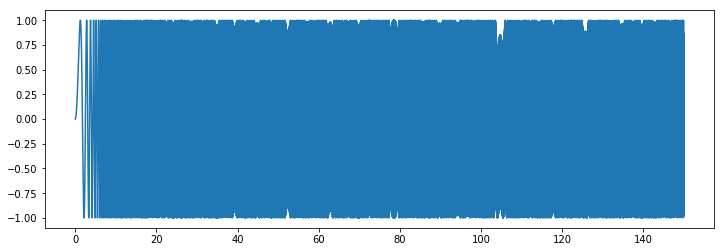

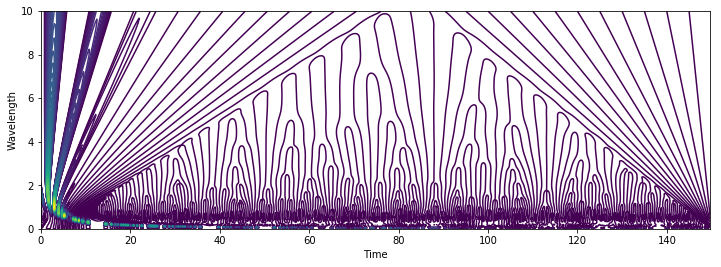

In [97]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure(figsize=(12, 4))                                    # Create figure
plt.plot(tar,yarr)  

fig = plt.figure(figsize=(12, 4))
levels=np.arange(abs(np.transpose(ystau)).min(),abs(np.transpose(ystau)).max(),(abs(np.transpose(ystau)).max() - abs(np.transpose(ystau)).min())/100.)
#CS=plt.contour(sar,tauar, np.transpose(ystau).imag, levels=levels)
CS=plt.contour(tauar, sar, ystau.imag, levels=levels)
plt.xlabel('Time')
plt.ylabel('Wavelength')
plt.show()
plt.show()

The wavelet analysis shows a steadily decreasing frequency, consistent with the signal from gravitational waves. This graph can be seen as an "inverse" of the standard GW graph.